### Lab N0.02

#### Clasificación de rótulos de tráfico utilizando CNN Le-Net

- Paola de León 20361
- Gabriela Contreas 20213


In [76]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, losses


#### Parte 1

In [77]:
# ABRIR Y DIVIDIR DATA 
d_test = pd.read_pickle("./Datos_Rotulos_Trafico/prueba.p")
d_train = pd.read_pickle("./Datos_Rotulos_Trafico/entrenamiento.p")
d_validation = pd.read_pickle("./Datos_Rotulos_Trafico/validacion.p")

In [78]:
# REDIMENSIONAR
train_feature= d_train["features"]
train_feature.shape

train_label = d_train["labels"]
train_label.shape


(34799,)

In [79]:
# NORMALIZAR 
train_labelN = train_label / 255
train_featuresN = train_feature / 255

In [80]:
# DIVISION DE DATOS
train_features, test_features, train_labels, test_labels = train_test_split(train_feature, train_label, test_size=0.2, random_state=42)
train_feautres, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

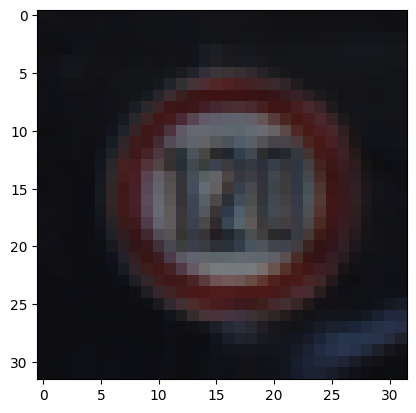

In [81]:
# VISUALIZACIÓN DE
plt.imshow(train_features[10])

#### Parte 3

In [82]:
#MODELO 
#ref: https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=train_feautres.shape[1:]))
model.add(layers.AveragePooling2D(2))


model.add(layers.Conv2D(16, 5, activation='relu'))

model.add(layers.AveragePooling2D())



model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_20 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_21 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_11 (Flatten)        (None, 400)               0         
                                                                 
 dense_27 (Dense)            (None, 120)             

#### Parte 4